In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
import warnings

warnings.filterwarnings('ignore')

# <font color = blue> Best-Selling Novels on Amazon </font> 


In [2]:
df= pd.read_csv('bestsellers with categories.csv')

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


#### This dataset contains names of bestselling-novels with categories from 2009-2019. I have the data for the best-selling novels along with various pieces of information about the authros, user ratings , reviews, year of book launch, price and types of genres.  Let's find some interesting insights into these novels using Python.


### Inspecting the data


In [4]:
df.shape

(550, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [6]:
## lets find the null values in the data frame
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [7]:
df = df.drop_duplicates(subset='Name',keep='last')

##  The most common genre

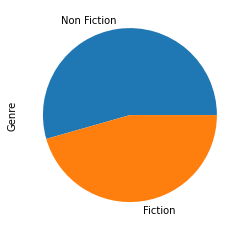

In [8]:
df.Genre.value_counts(normalize=True).plot.pie()
plt.show()

 #### The majority of the books in the data set are non-fiction

## Lets take a look at the non-fiction genres

In [9]:
##extracting the non fiction genres
df_nonFiction = df.loc[df['Genre']=='Non Fiction']

In [10]:
df_nonFiction

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010,Non Fiction
...,...,...,...,...,...,...,...
533,When Breath Becomes Air,Paul Kalanithi,4.8,13779,14,2016,Non Fiction
536,Whose Boat Is This Boat?: Comments That Don't ...,The Staff of The Late Show with,4.6,6669,12,2018,Non Fiction
537,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,4.4,17044,18,2012,Non Fiction
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction


## Finding the most popular books in non-fiction category

In [11]:
## sorting the datframce by their user rating
df_nonFiction.sort_values('User Rating',ascending=False)

,Name,Author,User Rating,Reviews,Price,Year,Genre
174,Humans of New York : Stories,Brandon Stanton,4.9,2812,17,2015,Non Fiction
521,Unfreedom of the Press,Mark R. Levin,4.9,5956,11,2019,Non Fiction
431,The Magnolia Story,Chip Gaines,4.9,7861,5,2016,Non Fiction
192,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2016,Non Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
...,...,...,...,...,...,...,...
344,The Blood Sugar Solution: The UltraHealthy Pro...,Mark Hyman M.D.,4.2,1789,14,2012,Non Fiction
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction
298,Shred: The Revolutionary Diet: 6 Weeks 4 Inche...,Ian K. Smith M.D.,4.1,2272,6,2013,Non Fiction
363,"The Dukan Diet: 2 Steps to Lose the Weight, 2 ...",Pierre Dukan,4.1,2023,15,2011,Non Fiction


In [113]:
 popular_nf = df_nonFiction.loc[(df_nonFiction['User Rating'] > 4.3) & (df_nonFiction['Reviews'] > 8500)].reset_index(drop=True)

In [124]:
popular_nf.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
2,Alexander Hamilton,Ron Chernow,4.8,9198,13,2016,Non Fiction
3,American Sniper: The Autobiography of the Most...,Chris Kyle,4.6,15921,9,2015,Non Fiction
4,Astrophysics for People in a Hurry,Neil deGrasse Tyson,4.7,9374,9,2017,Non Fiction


### Top 10 non fiction books

In [24]:
### top 10 non-fiction books
top10_nf =df_nonFiction.head(10)

In [71]:
top10_nf.reset_index(drop=True)#drop=True

,index,Name,Author,User Rating,Reviews,Price,Year,Genre
0,0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
2,4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
3,8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
4,11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010,Non Fiction
5,12,A Stolen Life: A Memoir,Jaycee Dugard,4.6,4149,32,2011,Non Fiction
6,14,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
7,15,Adult Coloring Book Designs: Stress Relief Col...,Adult Coloring Book Designs,4.5,2313,4,2016,Non Fiction
8,16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
9,17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction


### we see that there are duplicate names in the data frame
### we also inspect that the duplicate rows are similar except the year change
### it might be because of new edition of the book is launched each year
##  
#df = df[df.duplicated(['Name'])].drop

In [73]:
top10_nf = top10_nf.drop(columns=['index'])

In [65]:
### lets take a look how ratings varies with the price and reviews
### extracting the names and authors into a list
#df.to_dict('Name','Author')

### GETTING TOP10 BOOKS AND AUTHORS NAME INTO A DICT/ List

In [81]:
dic_1 = top10_nf.iloc[:,:2]

In [86]:
dic_1.values.tolist()

[['10-Day Green Smoothie Cleanse', 'JJ Smith'],
 ['12 Rules for Life: An Antidote to Chaos', 'Jordan B. Peterson'],
 ['5,000 Awesome Facts (About Everything!) (National Geographic Kids)',
  'National Geographic Kids'],
 ['A Higher Loyalty: Truth, Lies, and Leadership', 'James Comey'],
 ["A Patriot's History of the United States: From Columbus's Great Discovery to the War on Terror",
  'Larry Schweikart'],
 ['A Stolen Life: A Memoir', 'Jaycee Dugard'],
 ['Act Like a Lady, Think Like a Man: What Men Really Think About Love, Relationships, Intimacy, and Commitment',
  'Steve Harvey'],
 ['Adult Coloring Book Designs: Stress Relief Coloring Book: Garden Designs, Mandalas, Animals, and Paisley Patterns',
  'Adult Coloring Book Designs'],
 ['Adult Coloring Book: Stress Relieving Animal Designs',
  'Blue Star Coloring'],
 ['Adult Coloring Book: Stress Relieving Patterns', 'Blue Star Coloring']]

## Finding the most sucessful author and his books in non-fiction category

In [118]:
popular_authornf = popular_nf.groupby(['Author'])['Author'].count().sort_values(ascending=False).head(1)

In [119]:
popular_authornf

Author
Bill O'Reilly    5
Name: Author, dtype: int64

In [123]:
popular_nf.loc[popular_nf['Author']=="Bill O'Reilly" ].reset_index(drop=True)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,Killing Jesus (Bill O'Reilly's Killing Series),Bill O'Reilly,4.5,11391,12,2013,Non Fiction
1,Killing Kennedy: The End of Camelot,Bill O'Reilly,4.6,8634,25,2012,Non Fiction
2,Killing Lincoln: The Shocking Assassination th...,Bill O'Reilly,4.7,9342,10,2012,Non Fiction
3,Killing Patton: The Strange Death of World War...,Bill O'Reilly,4.6,10927,6,2014,Non Fiction
4,Killing the Rising Sun: How America Vanquished...,Bill O'Reilly,4.8,8916,6,2016,Non Fiction


## Fiction Category

In [128]:
df_fiction = df.loc[df['Genre']=='Fiction'].reset_index(drop=True)

## Finding the most popular books in Fiction category

In [129]:
df_nonFiction.sort_values('User Rating',ascending=False)

,Name,Author,User Rating,Reviews,Price,Year,Genre
174,Humans of New York : Stories,Brandon Stanton,4.9,2812,17,2015,Non Fiction
521,Unfreedom of the Press,Mark R. Levin,4.9,5956,11,2019,Non Fiction
431,The Magnolia Story,Chip Gaines,4.9,7861,5,2016,Non Fiction
192,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2016,Non Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
...,...,...,...,...,...,...,...
344,The Blood Sugar Solution: The UltraHealthy Pro...,Mark Hyman M.D.,4.2,1789,14,2012,Non Fiction
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction
298,Shred: The Revolutionary Diet: 6 Weeks 4 Inche...,Ian K. Smith M.D.,4.1,2272,6,2013,Non Fiction
363,"The Dukan Diet: 2 Steps to Lose the Weight, 2 ...",Pierre Dukan,4.1,2023,15,2011,Non Fiction


In [135]:
 popular_f = df_fiction.loc[(df_fiction['User Rating'] > 4.3) & (df_fiction['Reviews'] > 8500)].reset_index(drop=True).head(10)

In [136]:
popular_f

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
1,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
2,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
3,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
4,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
5,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction
6,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
7,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
8,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2012,Fiction
9,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2018,Fiction


## Finding the most sucessful author and his books in fiction category




In [139]:
popular_authorf = popular_f.groupby(['Author'])['Author'].count().sort_values(ascending=False).head(1)


In [140]:
popular_authorf

Author
George R. R. Martin    2
Name: Author, dtype: int64

###  Fiction vs Non-Fiction

<AxesSubplot:xlabel='Genre', ylabel='Reviews'>

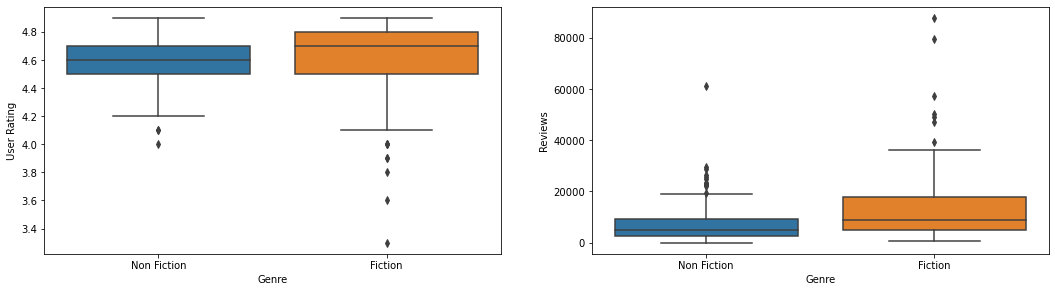

In [150]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.boxplot(df.Genre,df['User Rating'])
plt.subplot(2,2,2)
sns.boxplot(df.Genre,df['Reviews'])

Inferences 1 : The median of user-rating is slightly higher for Fiction category.


Inferences 2 : The quartile range of fiction category is more as compared to non-fiction category. Even though the count of 
               fiction category is less in the data frame

Inferences 3 : The reviews recieved for fiction category is much higher.


# Looking at the box plots we can conclude that fiction category is more popular with the readers 